# Random Forest classification Group 13

# Imports 

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import time

# Loading the cleaned data
## Processing the features so the errors are not too big depending on the value
- [Normalising Data](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/)

In [2]:
spotify_df = pd.read_csv('../updated_spotify_data.csv')
selected_features = ['energy', 'loudness', 'liveness', 'instrumentalness', 'danceability']
spotify_df = spotify_df[selected_features]

# Min Max scaling to normalise the data
scaler = MinMaxScaler()
spotify_df[selected_features[:-1]] = scaler.fit_transform(spotify_df[selected_features[:-1]])

# Split data into training and testing sets
X = spotify_df[selected_features[:-1]]
y = spotify_df['danceability'] # Labels


# Split the data into a training set and a combined validation-test set
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the combined validation-test set into a validation set and a test set
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


# Train the model and predict with random hyperparameters
## Random forests take quite some time to train, so we have measured the time taken
- [Classification Report](https://www.statology.org/sklearn-classification-report/) - Classification report knowledge

In [9]:
# Convert labels to binary classification based on threshold
threshold = 0.5
y_train_binary = np.where(y_train > threshold, 1, 0)
y_test_binary = np.where(y_test > threshold, 1, 0)

# Initialize Random Forest Classifier with your desired hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=10, max_depth=50, min_samples_leaf=50, min_samples_split=10, random_state=42)

# Measure time taken to train the model
start_time = time.time()
rf_classifier.fit(X_train, y_train_binary)
end_time = time.time()
training_time = end_time - start_time

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate model performance on the test set
accuracy_rf = accuracy_score(y_test_binary, y_pred_rf)
f1_rf = f1_score(y_test_binary, y_pred_rf)
recall_rf = recall_score(y_test_binary, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test_binary, y_pred_rf)
classification_report_rf = classification_report(y_test_binary, y_pred_rf)

# Print metrics and training time
print(f"Accuracy: {accuracy_rf}")
print(f"F1 Score: {f1_rf}")
print(f"Recall: {recall_rf}")
print(f"Confusion Matrix:\n{confusion_matrix_rf}")
print(f"Classification Report:\n{classification_report_rf}")
print(f"Training Time: {training_time} seconds")

Accuracy: 0.6903333333333334
F1 Score: 0.7576563885845463
Recall: 0.828786668188563
Confusion Matrix:
[[3094 3145]
 [1500 7261]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57      6239
           1       0.70      0.83      0.76      8761

    accuracy                           0.69     15000
   macro avg       0.69      0.66      0.66     15000
weighted avg       0.69      0.69      0.68     15000

Training Time: 1.4213011264801025 seconds


# Plotting charts to visualise the model performace

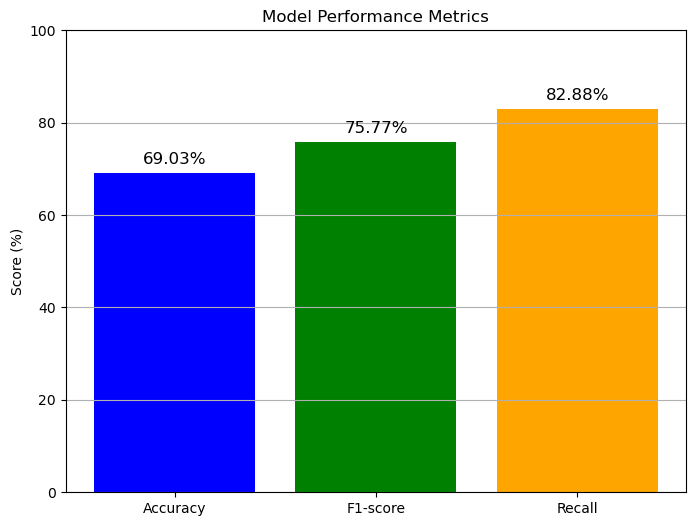

In [10]:
# Data for plotting
metrics = ['Accuracy', 'F1-score', 'Recall']

# Change to percentages for better visual representation
accuracy_percentage = accuracy_rf * 100
f1_percentage = f1_rf * 100
recall_percentage = recall_rf * 100

scores = [accuracy_percentage, f1_percentage, recall_percentage]

# Bar plot for performance metrics
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, scores, color=['blue', 'green', 'orange'])
plt.title('Model Performance Metrics')
plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.grid(axis='y')

# Show the scores on top of the bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, score + 2, f'{score:.2f}%', ha='center', color='black', fontsize=12)

plt.show()

# Visualising the confusion matrix
- [Enumerate](https://www.w3schools.com/python/ref_func_enumerate.asp) - Enumerate function
- [Confusion Matrix](https://www.w3schools.com/python/python_ml_confusion_matrix.asp) - Confusion matrix

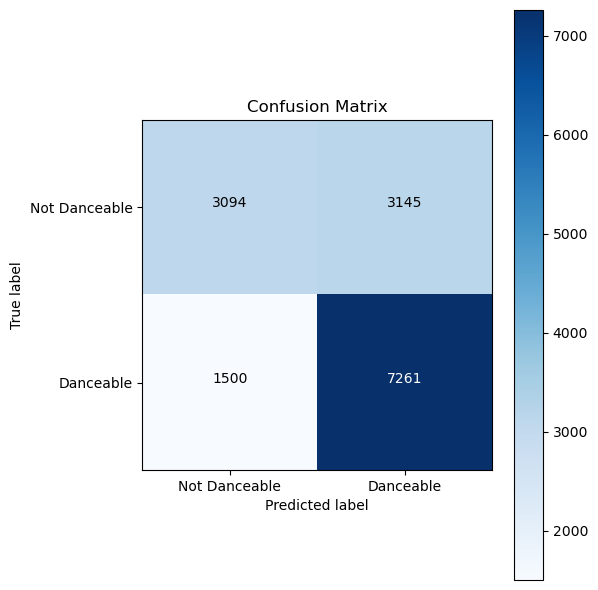

In [11]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Usage:
plot_confusion_matrix(confusion_matrix_rf, classes=['Not Danceable', 'Danceable'])
plt.show()

# Storing the time taken to train and predict using the random forest


In [12]:
# Start timer
start_time = time.time()

# Train the model on the training set
rf_classifier.fit(X_train, y_train_binary)

# End timer and print training time
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Start timer
start_time = time.time()

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# End timer and print prediction time
prediction_time = time.time() - start_time
print(f"Prediction Time: {prediction_time:.2f} seconds")


Training Time: 1.46 seconds
Prediction Time: 0.02 seconds


# Difference between training and prediction time is quite significant

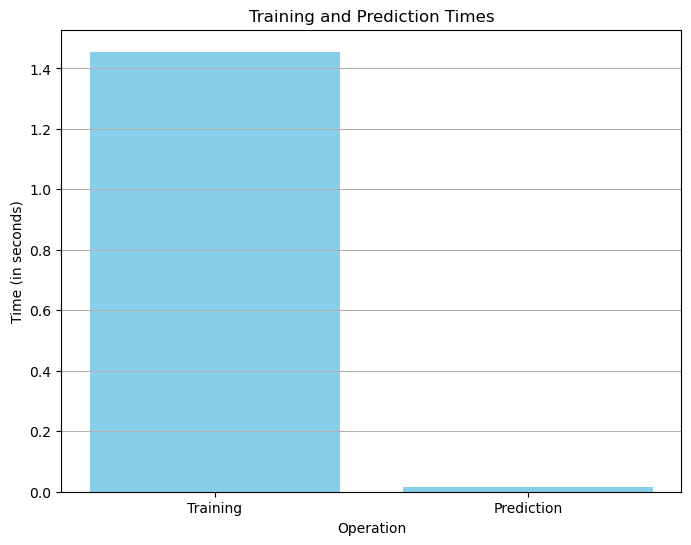

In [13]:
# Create a bar chart to visualise training and prediction times
times = [training_time, prediction_time]
labels = ['Training', 'Prediction']

plt.figure(figsize=(8, 6))
plt.bar(labels, times, color='skyblue')
plt.title('Training and Prediction Times')
plt.xlabel('Operation')
plt.ylabel('Time (in seconds)')
plt.grid(axis='y')
plt.show()

In [14]:
# Define a range of n_estimators values to search over
n_estimators_values = [10, 50, 100, 200, 300]

best_n_estimators = None
best_accuracy = 0.0

for n_estimators in n_estimators_values:
    # Create and train the Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=50, min_samples_leaf=50, min_samples_split=10, random_state=42)
    rf_classifier.fit(X_train, y_train_binary)
    
    # Predict on the validation set
    y_val_pred_rf = rf_classifier.predict(X_val)
    
    # Calculate accuracy on the validation set
    accuracy = accuracy_score(y_val_binary, y_val_pred_rf)
    
    # Check if this is the best accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print(f"Best n_estimators on validation set: {best_n_estimators}")
print(f"Best accuracy on validation set: {best_accuracy}")


NameError: name 'y_val_binary' is not defined

# Tune the number of estimators hyper parameter to find the best fit for the mode
- Trained on a range from 10 to 500
- Measured the accuracy, f1 score and recall
- Measured the training and prediction time
- [Tuning of hyper parameters](https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/) - Knowledge of what variables to tune

In [15]:
# Define diffferent numbers of trees to test
threshold = 0.5
y_val_binary = np.where(y_val > threshold, 1, 0)
y_test_binary = np.where(y_test > threshold, 1, 0)


n_estimators_list = [10,50,100, 200,250,300,350,400,450,500]

# Store metrics for each model
metrics = {'n_estimators': [], 'accuracy': [], 'f1_score': [], 'recall': []}

for n in n_estimators_list:
    # Initialise the Random Forest with the current number of trees
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    #Start timer
    start_time = time.time()
    # Train the model
    rf.fit(X_val, y_val_binary)
    training_time = time.time() - start_time
    # Predict on test set
    y_pred = rf.predict(X_test)
    
    # Store metrics
    metrics['n_estimators'].append(n)
    metrics['accuracy'].append(accuracy_score(y_test_binary, y_pred))
    metrics['f1_score'].append(f1_score(y_test_binary, y_pred))
    metrics['recall'].append(recall_score(y_test_binary, y_pred))
 

print(f"Training Time: {training_time:.2f} seconds")

Training Time: 11.59 seconds


# Plots of the model metrics for each value in the number of estimators array

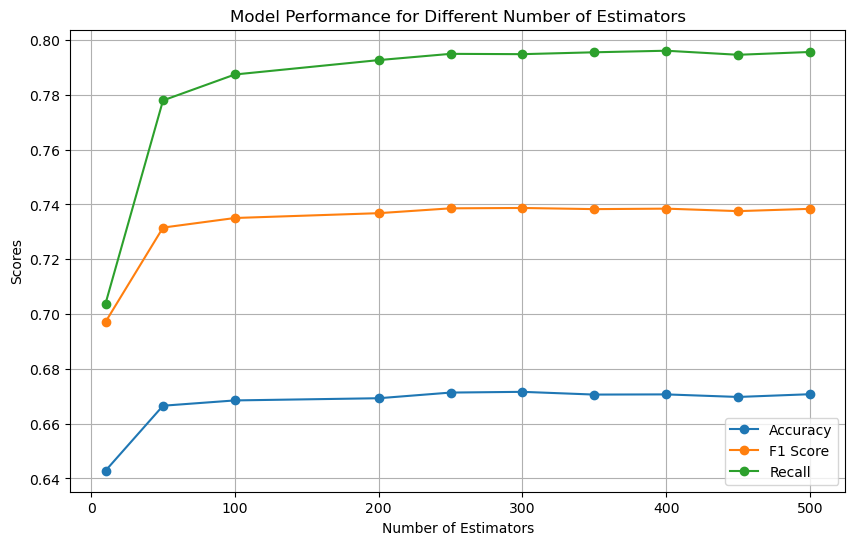

In [16]:
# Plot Accuracy v Number of Estimators
plt.figure(figsize=(10, 6))
plt.plot(metrics['n_estimators'], metrics['accuracy'], label='Accuracy', marker='o')
plt.plot(metrics['n_estimators'], metrics['f1_score'], label='F1 Score', marker='o')
plt.plot(metrics['n_estimators'], metrics['recall'], label='Recall', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Scores')
plt.title('Model Performance for Different Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

# Tuned the max depth hyperparameter for the best fit for our model
## Changed the number of estimators parameter to fit the best performing value from our previous test

In [17]:
# Define different values to test for max_depth
max_depth_list = [10, 20, 30, 40, 50]

# Store metrics for each model
max_depth_metrics = {'max_depth': [], 'accuracy': [], 'f1_score': [], 'recall': []}

for max_depth in max_depth_list:
    # Initialise the Random Forest with the current max_depth
    rf = RandomForestClassifier(n_estimators=200, max_depth=max_depth, random_state=42)
    
    # Start timer for training
    start_time = time.time()
    
    # Train the model
    rf.fit(X_val, y_val_binary)
    
    # End timer for training
    training_time = time.time() - start_time
    
    # Predict on the test set
    y_pred = rf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_binary, y_pred)
    
    # Store metrics
    max_depth_metrics['max_depth'].append(max_depth)
    max_depth_metrics['accuracy'].append(accuracy_score(y_test_binary, y_pred))
    max_depth_metrics['f1_score'].append(f1_score(y_test_binary, y_pred))
    max_depth_metrics['recall'].append(recall_score(y_test_binary, y_pred))

# Find the best max_depth based on accuracy
print(f"Training Time: {training_time:.2f} seconds")

Training Time: 4.64 seconds


# Plots of the models performance based on the max depth value

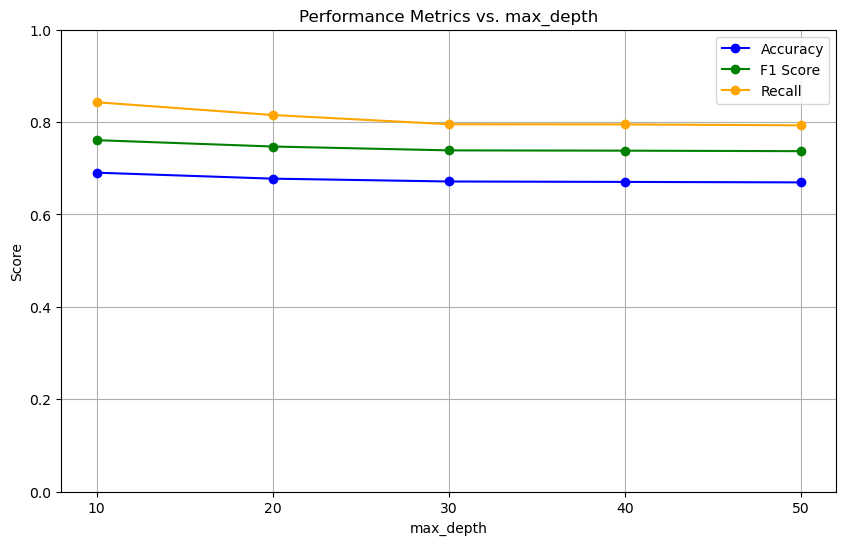

In [18]:
# Plot the values
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.plot(max_depth_metrics['max_depth'], max_depth_metrics['accuracy'], marker='o', label='Accuracy', color='blue')
# Plot F1-score
plt.plot(max_depth_metrics['max_depth'], max_depth_metrics['f1_score'], marker='o', label='F1 Score', color='green')
# Plot recall
plt.plot(max_depth_metrics['max_depth'], max_depth_metrics['recall'], marker='o', label='Recall', color='orange')

plt.title('Performance Metrics vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.xticks(max_depth_list)
plt.grid(True)
plt.legend()
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV
# Define a parameter grid with the values you want to search over

# Define a parameter grid with the values you want to search over
param_grid = {
    'min_samples_split': [2, 5, 10, 20],  # Example values, you can adjust these
    'min_samples_leaf': [1, 2, 4, 8],   # Example values, you can adjust these
    'max_features': ['auto', 'sqrt', 'log2', None],  # Example values, you can adjust these
    # Add other hyperparameters here
}

# Create a GridSearchCV object for hyperparameter tuning on the validation set
grid_search = GridSearchCV(estimator=RandomForestClassifier(n_estimators=300, max_depth=50, random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the validation set
grid_search.fit(X_val, y_val_binary)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train a Random Forest Classifier with the best hyperparameters on the combined training and validation sets
final_rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42, **best_params)
final_rf_classifier.fit(X_train, y_train)  

# Predict on the test set using the tuned hyperparameters
y_test_pred_rf = rf_classifier.predict(X_test)

# Evaluate model performance on the test set
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Accuracy on test set with tuned hyperparameters: {accuracy_rf}")


/Users/alisiddique/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alisiddique/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alisiddique/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/alisiddique/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_con

Accuracy on test set with tuned hyperparameters: 0.6848


In [21]:
print("Best parameters are: ",best_params)

Best parameters are:  {'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 20}


In [23]:
y_test_pred_rf

array([1, 1, 1, ..., 0, 1, 1])

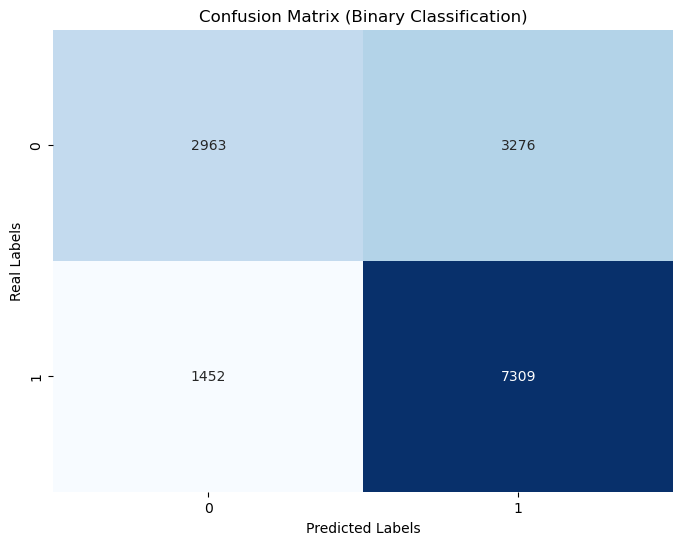

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_rf)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')
plt.title('Confusion Matrix (Binary Classification)')
plt.show()


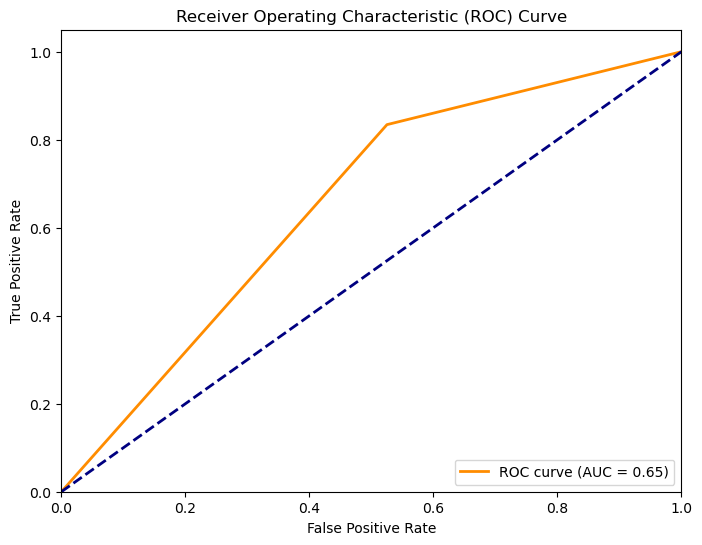

In [27]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_pred_rf)
roc_auc = auc(fpr, tpr)

# Create an ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

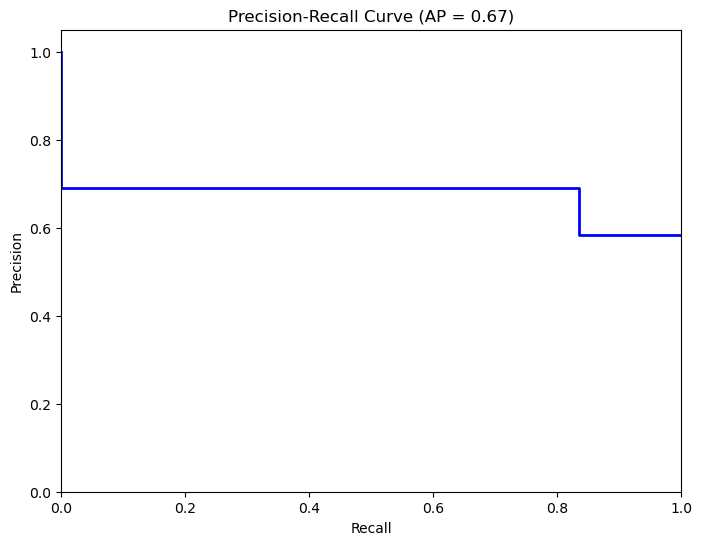

In [28]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curve and average precision score
precision, recall, _ = precision_recall_curve(y_test, y_test_pred_rf)
average_precision = average_precision_score(y_test, y_test_pred_rf)

# Create a precision-recall curve plot
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AP = {:.2f})'.format(average_precision))
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

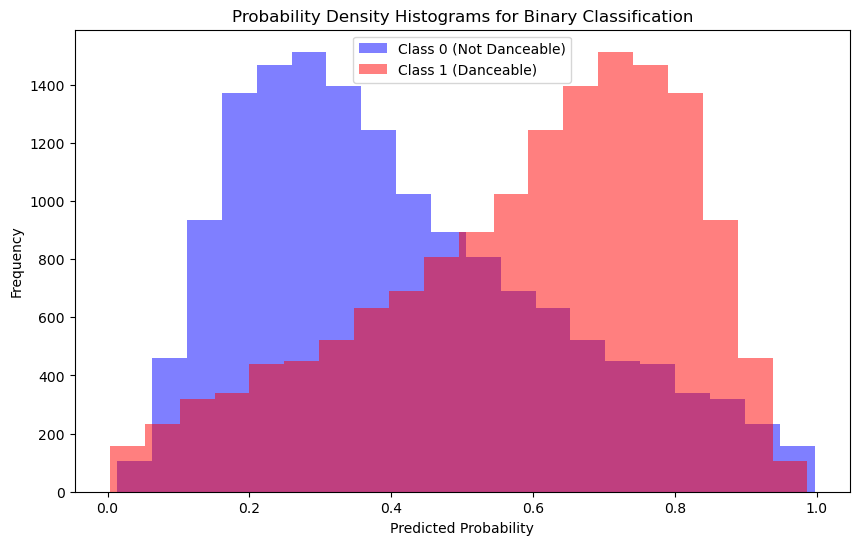

In [34]:
# Separate predicted probabilities for both classes
probs_class_0 = final_rf_classifier.predict_proba(X_test)[:, 0]
probs_class_1 = final_rf_classifier.predict_proba(X_test)[:, 1]

# Create histograms for predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(probs_class_0, bins=20, alpha=0.5, color='blue', label='Class 0 (Not Danceable)')
plt.hist(probs_class_1, bins=20, alpha=0.5, color='red', label='Class 1 (Danceable)')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Probability Density Histograms for Binary Classification')
plt.legend()
plt.show()


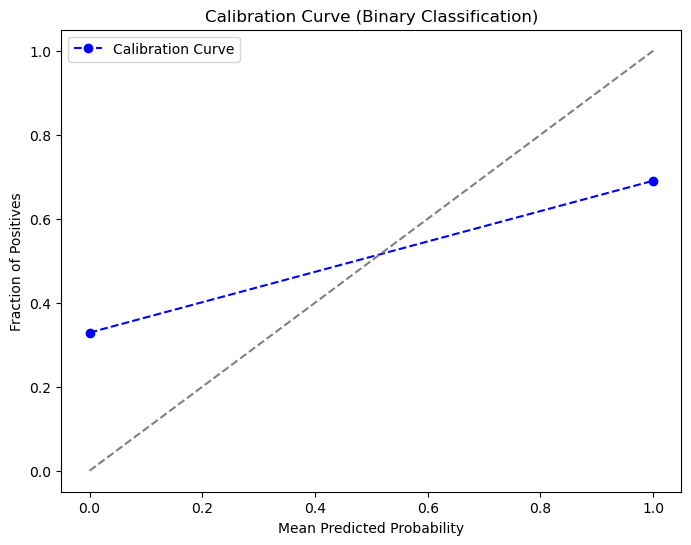

In [37]:
from sklearn.calibration import calibration_curve

# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_test_pred_rf, n_bins=10)

# Create a calibration curve plot
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linestyle='--', color='blue', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve (Binary Classification)')
plt.legend()
plt.show()




# Tuned the min samples hyperparameter for the best fit for our model
## Changed the number of estimators, max depth hyperparameter to fit the best performing value from our previous tests

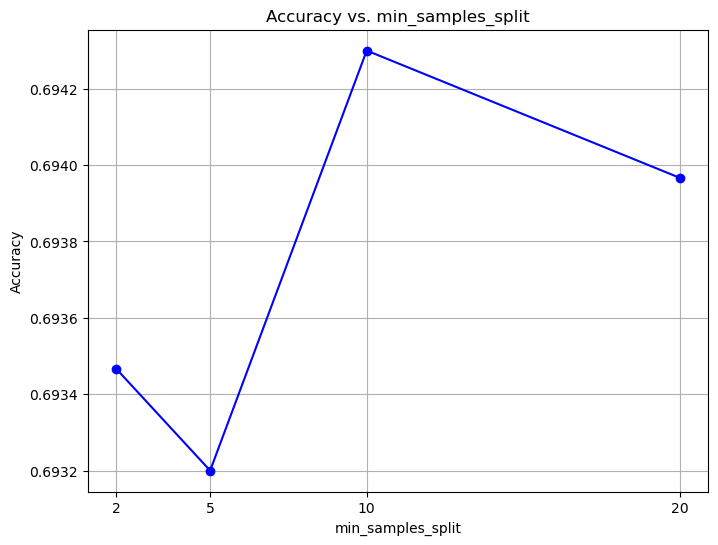

Training Time: 20.64 seconds


In [110]:
import matplotlib.pyplot as plt

# Define different values to test for min_samples_split
min_samples_split_list = [2, 5, 10, 20]

# Store metrics for each model
min_samples_split_metrics = {'min_samples_split': [], 'accuracy': []}

for min_samples_split in min_samples_split_list:
    # Initialize the Random Forest with the current min_samples_split
    rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=min_samples_split, random_state=42)
    
    # Start timer for training
    start_time = time.time()
    
    # Train the model
    rf.fit(X_train, y_train_binary)
    
    # End timer for training
    training_time = time.time() - start_time
    
    # Predict on the test set
    y_pred = rf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_binary, y_pred)
    
    # Store metrics
    min_samples_split_metrics['min_samples_split'].append(min_samples_split)
    min_samples_split_metrics['accuracy'].append(accuracy)

# Plot the accuracy values
plt.figure(figsize=(8, 6))
plt.plot(min_samples_split_metrics['min_samples_split'], min_samples_split_metrics['accuracy'], marker='o', color='blue')
plt.title('Accuracy vs. min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(min_samples_split_list)
plt.show()

    
print(f"Training Time: {training_time:.2f} seconds")

# Tuned the max features hyperparameter for the best fit for our model
### Changed the number of estimators, max depth,min samples hyperparameter to fit the best performing value from our previous tests

In [113]:
# Define different values to test for max_features
max_features_list = [1.0, 0.5, 0.2, None]

# Store metrics for each model
max_features_metrics = []

for max_features in max_features_list:
    # Initialise the Random Forest with the current max_features
    rf = RandomForestClassifier(n_estimators=200,max_depth=10,min_samples_split=20, max_features=max_features, random_state=42)
    
    # Start timer for training
    start_time = time.time()
    
    # Train the model
    rf.fit(X_train, y_train_binary)
    
    # End timer for training
    training_time = time.time() - start_time
    
    # Predict on the test set
    y_pred = rf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_binary, y_pred)
    
    # Store max_features, accuracy, and training time
    max_features_metrics.append({'max_features': max_features, 'accuracy': accuracy, 'training_time': training_time})


print(f"Training Time: {training_time:.2f} seconds")

Training Time: 38.86 seconds


# Accuracy for max features

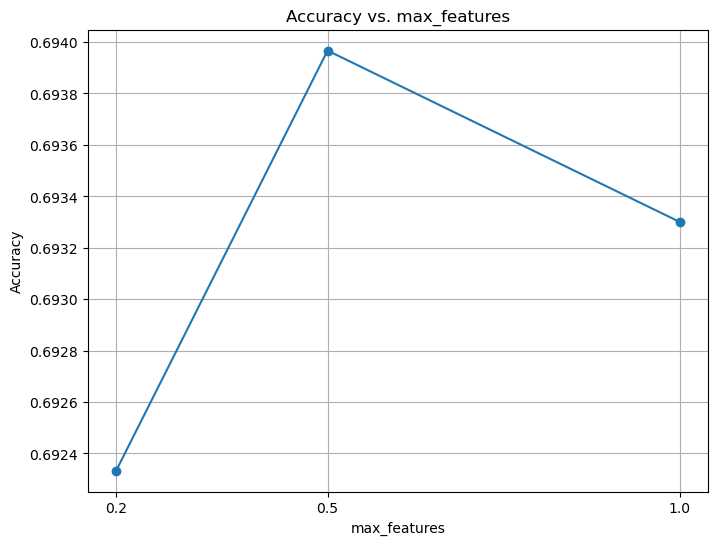

In [114]:
max_features_values = [entry['max_features'] for entry in max_features_metrics if entry['max_features'] is not None]
accuracy_values = [entry['accuracy'] for entry in max_features_metrics if entry['max_features'] is not None]

# Create a plot for max_features vs. accuracy
plt.figure(figsize=(8, 6))
plt.plot(max_features_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs. max_features')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.xticks(max_features_values)
plt.grid(True)
plt.show()